![Logo 1](https://git.wmi.amu.edu.pl/AITech/Szablon/raw/branch/master/Logotyp_AITech1.jpg)
<div class="alert alert-block alert-info">
<h1> Komputerowe wspomaganie tłumaczenia </h1>
<h2> 8. <i>Wykorzystanie tłumaczenia automatycznego we wspomaganiu tłumaczenia</i> [laboratoria]</h2> 
<h3>Rafał Jaworski (2021)</h3>
</div>

![Logo 2](https://git.wmi.amu.edu.pl/AITech/Szablon/raw/branch/master/Logotyp_AITech2.jpg)

W dzisiejszych czasach, niezwykle ważną techniką wspomagania tłumaczenia jest użycie tłumaczenia maszynowego. Tekst źródłowy do tłumaczenia jest najpierw tłumaczony całkowicie autommatycznie, a następnie tłumacz ludzki dokonuje korekty wyniku. Technologia tłumaczenia maszynowego jest już na tyle dojrzała, że oferuje bardzo wysoką jakość wyników. Coraz częstsze stają się scenariusze, w których ludzka korekta to niemal całkowicie machinalne (sic!) zatwierdzanie wyników tłumaczenia maszynowego. Na dzisiejszych zajęciach poznamy techniki ewaluacji tłumaczenia maszynowego oraz sprawdzania jego przydatności w procesie wspomagania tłumaczenia ludzkiego.

Jakość tłumaczenia maszynowego możemy oceniać na dwóch niezależnych płaszczyznach: dokładność i płynność. Płynność jest subiektywnie odbieranym odczuciem, że czytany tekst jest napisany językiem naturalnym i zrozumiałym. Systemy tłumaczenia maszynowego oparte na uczeniu głębokim z wykorzystaniem sieci neuronowych osiągają duży stopień płynności tłumaczenia. Niestety jednak ich dokładność nie zawsze jest równie wysoka.

Dokładność tłumaczenia maszynowego jest parametrem, który łatwiej zmierzyć. Wartość takich pomiarów daje obraz tego, jaka jest faktyczna jakość tłumaczenia maszynowego i jaka jest jego potencjalna przydatność we wspomaganiu tłumaczenia.

Najczęściej stosowaną techniką oceny tłumaczenia maszynowego jest ocena BLEU. Do obliczenia tej oceny potrzebny jest wynik tłumaczenia maszynowego oraz referencyjne tłumaczenie ludzkie wysokiej jakości.

### Ćwiczenie 1: Zaimplementuj program do obliczania oceny BLEU dla korpusu w folderze data. Użyj implementacji BLEU z pakietu nltk. Dodatkowe wymaganie techniczne - napisz program tak, aby nie musiał rozpakwowywać pliku zip z korpusem na dysku.

In [16]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 17.1 MB/s eta 0:00:0000:010:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import nltk
import zipfile
import string
from nltk.translate.bleu_score import corpus_bleu
def deletePunctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def tokenization(i):
    zip_path = './data/corpus_corrected.zip'
    files = ['corpus_de_human.txt', 'corpus_de_nmt.txt', 'corpus_en.txt']
   
    result = []
    with zipfile.ZipFile(zip_path, 'r') as zf:
        with zf.open(files[i]) as f:
            text = f.read().decode('utf-8')
            text = text.split("\n")   
            for sentence in text:
                if i == 0: 
                    result.append([deletePunctuation(sentence).split()])
                else:
                    result.append(deletePunctuation(sentence).split())
                    
            return result


HUMAN = tokenization(0)
MACHINE = tokenization(1)
STANDARD = tokenization(2)
print(len(HUMAN))
print(len(MACHINE))
corpus_bleu(HUMAN,MACHINE)

1001
1001


0.7476897494228967

In [21]:
def calculate_bleu():
    HUMAN = tokenization(0)
    MACHINE = tokenization(1)
    return corpus_bleu(HUMAN,MACHINE)

calculate_bleu()

0.7476897494228967

### Ćwiczenie 2: Oblicz wartość bleu na różnych fragmentach przykładowego korpusu (np. na pierwszych 100 zdaniach, zdaniach 500-600). Czy w jakimś fragmencie korpusu jakość tłumaczenia znacząco odbiega od średniej?

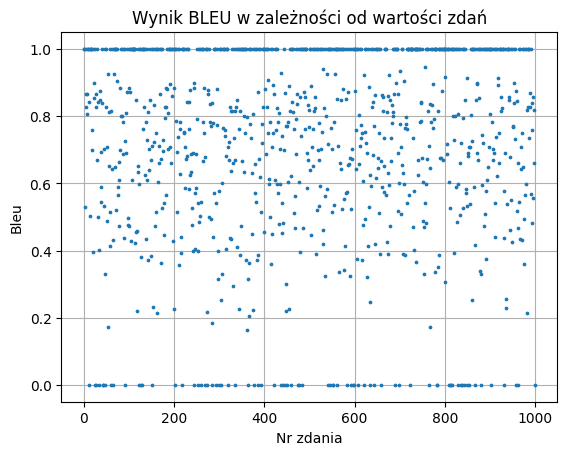

['[800-900)', 52]

In [48]:
from nltk.translate.bleu_score import sentence_bleu
import matplotlib.pyplot as plt
def analyze_bleu(interval):
    bleuResults = []
    errorNumber = 0
    er = []
    index = 0
    x = range(len(HUMAN)-1)
    for y in x:
        bleu = sentence_bleu(HUMAN[y], MACHINE[y])
        if bleu <= 0.7476897494228967:
            errorNumber += 1
        
        bleuResults.append(bleu)
        if index % interval == 0 and index != 0:
            er.append([f"[{index-interval}-{index})",errorNumber])
            errorNumber = 0
        index += 1

    plt.plot(x, bleuResults, 'o',markersize=1.7)
    plt.xlabel('Nr zdania')
    plt.ylabel('Bleu')
    plt.title('Wynik BLEU w zależności od wartości zdań')
    plt.grid(True)
    plt.show()
    
    maxEr = max(er, key=lambda x: x[1])
    return maxEr

analyze_bleu(100)

Inną metodą oceny jakości tłumaczenia maszynowego jest parametr WER - Word Error Rate. Definiuje się on w następujący sposób:

$WER = \frac{S+D+I}{N}=\frac{S+D+I}{S+D+C}$

gdzie:
 * S - liczba substytucji (słów)
 * D - liczba usunięć
 * I - liczba wstawień
 * C - liczba poprawnych śłów
 * N - liczba słów w tłumaczeniu referencyjnym (N=S+D+C)

Miara ta jest zwykle używana w do oceny systemów automatycznego rozpoznawania mowy, jednak w kontekście wspomagania tłumaczenia może być rozumiana jako wielkość nakładu pracy tłumacza nad poprawieniem tłumaczenia maszynowego.

### Ćwiczenie 3: Oblicz wartość WER dla przykładowego korpusu. Skorzystaj z gotowej implementacji WER.

In [43]:
from jiwer import wer

def calculate_wer():
    x = range(len(HUMAN)-1)
    w = 0
    for y in x:
        w += wer(" ".join(HUMAN[y][0])," ".join(MACHINE[y]))
        
    
    return w/(len(HUMAN)-1)
calculate_wer()

0.17738143121880412

In [47]:
print(wer(" ".join(HUMAN[0][0])," ".join(MACHINE[0])))

0.0


Poza wymienionymi powyżej, stosować można jeszcze inne miary oparte na porównywaniu tłumaczenia maszynowego z ludzkim. Przypomnijmy sobie jedną, którą stosowaliśmy wcześniej.

### Ćwiczenie 4: Oblicz średnią wartość dystansu Levenshteina pomiędzy zdaniami przetłumaczonymi automatycznie oraz przez człowieka. Użyj implementacji z ćwiczeń nr 2.

In [50]:
from Levenshtein import distance as levenshtein_distance

def levenshtein_similarity(x,y):
    return 1 - levenshtein_distance(x,y) / max(len(x), len(y))

def calculate_levenshtein():
    x = range(len(HUMAN)-1)
    l = 0
    for y in x:
        l += levenshtein_similarity(" ".join(HUMAN[y][0])," ".join(MACHINE[y]))
        
    return l/(len(HUMAN)-1)

calculate_levenshtein()

0.8802718348367172

A teraz sprawdźmy coś jeszcze. W danych przykładowego korpusu znajduje się także angielski tekst źródłowy. Teoretycznie, dobre tłumaczenie niemieckie powinno zawierać jak najwięcej słów z angielskiego źródła. Wykonajmy najstępujący eksperyment:

### Ćwiczenie 5: Dla każdej trójki zdań z korpusu przykładowego wykonaj następujące kroki:
 * Przetłumacz każde angielskie słowo na niemiecki przy użyciu modułu PyDictionary.
 * Sprawdź, które z niemieckich tłumaczeń zawiera więcej spośród tych przetłumaczonych słów - automatyczne, czy ludzkie.
Następnie wypisz statystyki zbiorcze. Które tłumaczenie zawiera więcej słownikowych tłumaczeń słów ze źródła?

In [1]:
import PyDictionary 
dictde = PyDictionary.PyDictionary() 
  
translation = dictde.translate("happy",'de') 
print(translation)

Invalid Word
None


In [2]:
from PyDictionary import PyDictionary

def translate(word):
    dictionary = PyDictionary()
    translation = dictionary.translate(word, 'de')
    return translation

def analyze_translations():
    dictionary = PyDictionary()
    result = []
    for sentence in STANDARD:
        words = []
        for word in sentence:
            words.append(dictionary.translate(word,'de'))
    result.append(words)

